# pySLAMMER user demo
This notebook shows the basic functionality of pySLAMMER.

*The code cells below are hidden... but that's in my JupyterLab settings, not in the notebook itself. I'll need to look into that.*

In [1]:
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
import ipywidgets as widgets
import SlidingBlock as sb

In [3]:
# Set up widgets for later use:
# NOTE: having these "hidden" by default does not work well. Can I do the notebook setup inside of pySLAMMER? That would be ideal.
# Defining the yield acceleration
ky_widget = widgets.BoundedFloatText(
        value=0.5,
        min=0,
        max=5.0,
        step=0.01,
        description='$k_y$ (g):',
        disabled=False
)
# Selecting the ground motion
gm_widget = widgets.Dropdown(
        options=[('Northridge', 'Northridge_VSP-360.csv'), ('Sine 1', 'sine_1_Hz.csv'), ('Nisqually', 103)],
        value='Northridge_VSP-360.csv',
        description='Select ground motion:',
)

# Setting the input PGA
analysis_widget = widgets.ToggleButtons(
        options=['Rigid', 'Decoupled', 'Coupled'],
        description='Analysis type:',
        disabled=False,
        button_style='', # 'success', 'info', 'warning', 'danger' or ''
        tooltips=[],
#     icons=['check'] * 3
)

# Start analysis
start_widget = widgets.Button(
        description='Run Analysis',
        disabled=False,
        button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Run Analysis',
        icon='brave' # (FontAwesome names without the `fa-` prefix)
)

## Setup
*Assumes pySLAMMER is installed. Will need to document how to install somewhere.*

First, import pySLAMMER using:
```python
import pySLAMMER as slam
```

## Inputs
Running an sliding block analysis with pySLAMMER requires at least two sets of input: 1) Slope parameters, and 2) a ground motion.

### Slope Parameters
For any analysis type, a yield acceleration, $k_y$, is needed. 
If coupled or decoupled analysis is performed, additional inputs are required.
For any analysis type, at least one value of $k_y$ is needed, but $k_y$ can also be a function of displacement.

**Widget**
Input the $k_y$ value in a textbox that only allows for numeric input (float).
```python
ky = 0.5 % g
```

### Ground motion
Default assumption: a recorded ground motion

**Widget**
Select record, input desired PGA

## Analysis and Results

In [4]:
def run_analysis(a=None):
    g = 9.81
    tHist = sb.normModeTimeHist("sample_ground_motions/" + gm_widget.value)
    k_y = ky_widget.value*g
    gAcc, gVel, bVel, bDisp, t = sb.downslopeAnalysis(tHist,k_y)
    fig, axs = sb.plotOutput(gAcc,gVel,bVel,bDisp,t,k_y/g)
    plt.show()
    
def on_button_clicked(a):
    with out:
        out.clear_output()
        run_analysis()

out = widgets.Output()

display(ky_widget)
display(analysis_widget)
display(gm_widget)
display(start_widget)
display(out)

start_widget.on_click(on_button_clicked)

BoundedFloatText(value=0.5, description='$k_y$ (g):', max=5.0, step=0.01)

ToggleButtons(description='Analysis type:', options=('Rigid', 'Decoupled', 'Coupled'), value='Rigid')

Dropdown(description='Select ground motion:', options=(('Northridge', 'Northridge_VSP-360.csv'), ('Sine 1', 's…

Button(button_style='warning', description='Run Analysis', icon='brave', style=ButtonStyle(), tooltip='Run Ana…

Output()

### Functionality to add
* Ground motion scaling
* Harmonic motion selections
* Tabs... that's getting pretty far into GUI territory. But if it makes things cleaner to use, it would be worth it.
* Fix the button layout so all the labels can be fully printed out


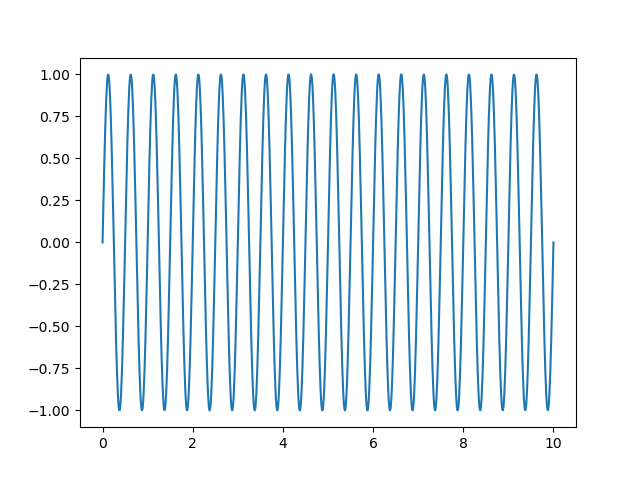

In [5]:
import numpy as np
plt.close('all')
time = np.linspace(0, 10, 1000)
frequency = 2
y = np.sin(2 * np.pi * frequency * time)
plt.plot(time, y)
plt.show()